# Credit Risk Classification using Logistic Regression

# Problem Statement:-
# This project aims to predict credit risk (Good or Bad) using logistic regression. The dataset contains various customer features, and the target variable is binary: 0 for Good and 1 for Bad.



# Step 1: Load and Explore the Dataset


In [64]:
import pandas as pd

# Define column names manually since the dataset doesn't include headers
column_names = [
    "Status", "Duration", "CreditHistory", "Purpose", "CreditAmount",
    
    "Savings", "Employment", "InstallmentRate", "PersonalStatusSex",
    "OtherDebtors", "ResidenceSince", "Property", "Age", "OtherInstallmentPlans",
    "Housing", "ExistingCredits", "Job", "NumPeopleLiable", "Telephone",
    "ForeignWorker", "CreditRisk"
]

# Load dataset
df = pd.read_csv("german.data", sep=' ', header=None, names=column_names)

# Display the first few rows
print(df.head())


  Status  Duration CreditHistory Purpose  CreditAmount Savings Employment  \
0    A11         6           A34     A43          1169     A65        A75   
1    A12        48           A32     A43          5951     A61        A73   
2    A14        12           A34     A46          2096     A61        A74   
3    A11        42           A32     A42          7882     A61        A74   
4    A11        24           A33     A40          4870     A61        A73   

   InstallmentRate PersonalStatusSex OtherDebtors  ...  Property Age  \
0                4               A93         A101  ...      A121  67   
1                2               A92         A101  ...      A121  22   
2                2               A93         A101  ...      A121  49   
3                2               A93         A103  ...      A122  45   
4                3               A93         A101  ...      A124  53   

   OtherInstallmentPlans Housing ExistingCredits   Job NumPeopleLiable  \
0                   A143    A1

# Step 2: Data Preprocessing



In [54]:
# Shape
print("Dataset shape:", df.shape)

# Data types
print(df.dtypes)


# Null values
print(df.isnull().sum())

# Class balance
print(df['CreditRisk'].value_counts())  # 1 = good, 2 = bad (convert later)
# Convert target to binary: 1 (Good) → 0, 2 (Bad) → 1
df['CreditRisk'] = df['CreditRisk'].map({1: 0, 2: 1})

# One-hot encode categorical features
df_encoded = pd.get_dummies(df.drop("CreditRisk", axis=1), drop_first=True)

# Final feature matrix and target
X = df_encoded
y = df["CreditRisk"]


Dataset shape: (1000, 21)
Status                   object
Duration                  int64
CreditHistory            object
Purpose                  object
CreditAmount              int64
Savings                  object
Employment               object
InstallmentRate           int64
PersonalStatusSex        object
OtherDebtors             object
ResidenceSince            int64
Property                 object
Age                       int64
OtherInstallmentPlans    object
Housing                  object
ExistingCredits           int64
Job                      object
NumPeopleLiable           int64
Telephone                object
ForeignWorker            object
CreditRisk                int64
dtype: object
Status                   0
Duration                 0
CreditHistory            0
Purpose                  0
CreditAmount             0
Savings                  0
Employment               0
InstallmentRate          0
PersonalStatusSex        0
OtherDebtors             0
ResidenceSince    

In [65]:
from sklearn.model_selection import train_test_split

# Split: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



# Step 3: Train Logistic Regression Model


In [56]:
from sklearn.linear_model import LogisticRegression

# Create the model
model = LogisticRegression(class_weight='balanced',max_iter=5000, solver ='lbfgs')

# Train (fit) the model using the training data
model.fit(X_train_scaled, y_train)


LogisticRegression(class_weight='balanced', max_iter=5000)

# Step 4: Evaluation


In [57]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Confusion Matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Detailed Report
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.75
Confusion Matrix:
 [[102  38]
 [ 12  48]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.73      0.80       140
           1       0.56      0.80      0.66        60

    accuracy                           0.75       200
   macro avg       0.73      0.76      0.73       200
weighted avg       0.79      0.75      0.76       200



# step 5: Confusion_matrix

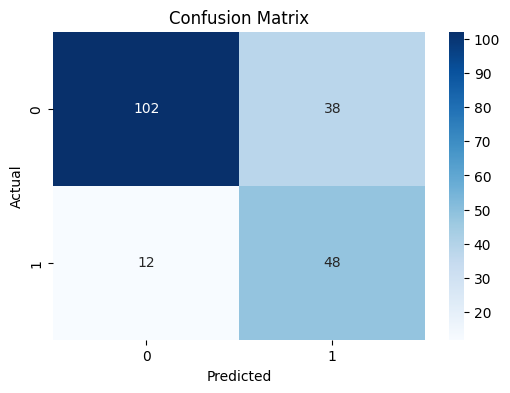

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Get confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.savefig('outputs/confusion_matrix.png')
plt.show()


# Step 6: ROC Curve & AUC

AUC Score: 0.803


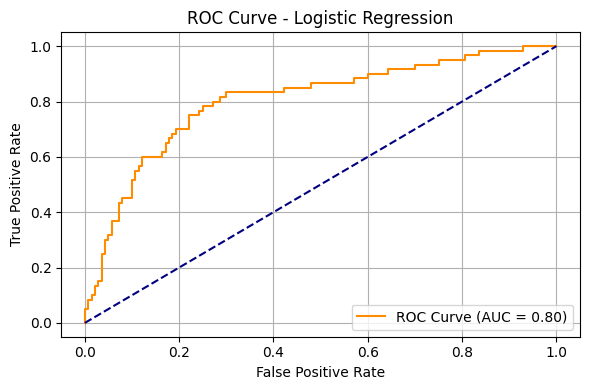

In [71]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt

# ✅ Get probabilities for class 1 (bad credit)
y_proba = model.predict_proba(X_test_scaled)[:, 1]

# ✅ ROC values
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

# ✅ AUC score
roc_auc = auc(fpr, tpr)
print(f"AUC Score: {roc_auc:.3f}")

# ✅ Plot ROC
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.savefig('outputs/roc_curve.png')
plt.show()


# Step 7: Precision-Recall Curve


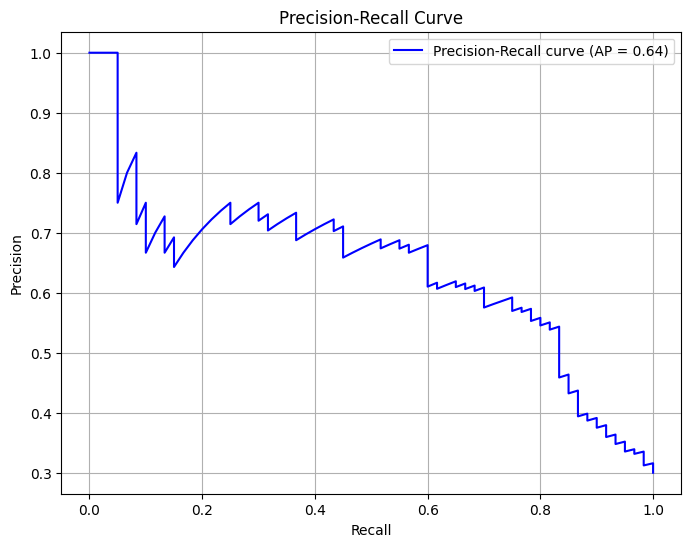

In [72]:
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

# Assuming you already have:
# y_test (true labels)
# model.predict_proba(X_test_scaled)[:, 1] (probabilities for positive class)

y_proba = model.predict_proba(X_test_scaled)[:, 1]

precision, recall, thresholds = precision_recall_curve(y_test, y_proba)
avg_precision = average_precision_score(y_test, y_proba)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', label=f'Precision-Recall curve (AP = {avg_precision:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid()
plt.savefig('outputs/precision-recall_curve.png')
plt.show()


In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Only using compatible combinations
param_grid = [
    {
        'penalty': ['l2'],
        'C': [0.01, 0.1, 1, 10, 100],
        'solver': ['lbfgs', 'liblinear'],
        'max_iter': [200]
    },
    {
        'penalty': ['l1'],
        'C': [0.01, 0.1, 1, 10, 100],
        'solver': ['liblinear', 'saga'],
        'max_iter': [200]
    },
    {
        'penalty': ['elasticnet'],
        'C': [0.01, 0.1, 1, 10],
        'solver': ['saga'],
        'l1_ratio': [0.5],  # Only saga supports l1_ratio
        'max_iter': [200]
    },
    {
        'penalty': ['none'],
        'solver': ['lbfgs', 'saga'],
        'max_iter': [200]
    }
]

grid = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='average_precision', n_jobs=-1)
grid.fit(X_train_scaled, y_train)

print("✅ Best Parameters:", grid.best_params_)
print("✅ Best AP Score:", grid.best_score_)


C:\Users\Komal\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
10 fits failed out of a total of 130.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Komal\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Komal\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
  File "C:\Users\Komal\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.p

✅ Best Parameters: {'C': 1, 'l1_ratio': 0.5, 'max_iter': 200, 'penalty': 'elasticnet', 'solver': 'saga'}
✅ Best AP Score: 0.6132619017669326


# Save Model

In [69]:
import os
import joblib

# Create the outputs directory if it doesn't exist
os.makedirs('outputs', exist_ok=True)

# Save the trained logistic regression model
joblib.dump(model, 'outputs/logistic_model.pkl')


['outputs/logistic_model.pkl']

In [70]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Predict on test set
y_pred = model.predict(X_test_scaled)

# Generate evaluation metrics
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

# Create outputs directory if not exists
os.makedirs('outputs', exist_ok=True)

# Save the metrics
with open('outputs/metrics_report.txt', 'w') as f:
    f.write(f'Accuracy: {accuracy:.2f}\n\n')
    f.write('Confusion Matrix:\n')
    f.write(str(conf_matrix) + '\n\n')
    f.write('Classification Report:\n')
    f.write(report)



# Conclusion

# This logistic regression model provides a good trade-off between precision and recall. With class balancing and hyperparameter tuning, performance improved significantly.

